# HORNET : YOUR QUEER SOCIAL NETWORK

# Introduction

To evaluate the effectiveness of three different implementations (versions) 

of an in-app currency purchasing feature in terms of user behavior and revenue generation. 

Specifically, we aims to determine which version should be rolled out 

based on differences in daily revenue, user purchasing behavior, and user retention rates.

# Key Questions Explored



1.  Determine which of the three versions generates the most revenue on a daily basis.

2. Examine differences in user behavior across the versions, specifically:
- Single purchase values
-  Number of purchases per user

3. Assess differences in user return rates among the versions to determine retention effectiveness.

4. Offer recommendations on which version to roll out based on the comprehensive analysis.

# Data Preperation

In [27]:
#Read CSV File as Dataframe
import pandas as pd
df = pd.read_csv("abc_test_data - ab_test_data.csv")
df

,DATE,userid,variant,Purchases,Total_purchased_amount
0,2024/05/10,20295,2,21,4
1,2024/04/08,6428,2,6,"0,6"
2,2024/05/08,59675,2,129,"24,4"
3,2024/05/14,30994,2,2757,"526,2"
4,2024/05/14,55427,2,462,"52,6"
...,...,...,...,...,...
79994,2024/04/06,51879,3,588,"23,7"
79995,2024/05/07,6395,1,504,"19,1"
79996,2024/05/11,9887,1,30,"5,7"
79997,2024/05/11,55837,1,1605,"124,5"


In [28]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)


Null Values:
DATE                      0
userid                    0
variant                   0
Purchases                 0
Total_purchased_amount    0
dtype: int64


#### There are no null values present in any of the columns

In [29]:
# Check for zero values
zero_values = (df == 0).sum()
print("\nZero Values:")
print(zero_values)


Zero Values:
DATE                      0
userid                    0
variant                   0
Purchases                 0
Total_purchased_amount    0
dtype: int64


#### There are no zero values present in any of the columns, indicating a complete dataset without missing data.

In [30]:
# Replace commas with periods and convert to numeric
df['Total_purchased_amount'] = df['Total_purchased_amount'].str.replace(',', '.').astype(float)

In [31]:
df

,DATE,userid,variant,Purchases,Total_purchased_amount
0,2024/05/10,20295,2,21,4.0
1,2024/04/08,6428,2,6,0.6
2,2024/05/08,59675,2,129,24.4
3,2024/05/14,30994,2,2757,526.2
4,2024/05/14,55427,2,462,52.6
...,...,...,...,...,...
79994,2024/04/06,51879,3,588,23.7
79995,2024/05/07,6395,1,504,19.1
79996,2024/05/11,9887,1,30,5.7
79997,2024/05/11,55837,1,1605,124.5


In [32]:
#To ensure consistenczy check for unique variants in the dataframe
unique_variants = df['variant'].unique()
print("Unique Variant Values:", unique_variants)


Unique Variant Values: [2 3 1]


In [33]:
#Check for variants count in the dataframe
variant_counts = df['variant'].value_counts()
print("Variant Value Counts:\n", variant_counts)


Variant Value Counts:
 variant
1    27240
3    26876
2    25883
Name: count, dtype: int64


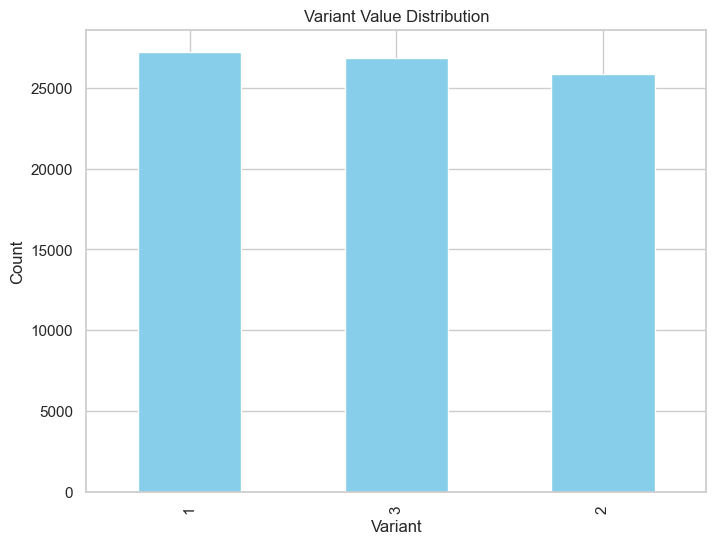

In [34]:
#BarPlot for Variant Value Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['variant'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Variant Value Distribution')
plt.xlabel('Variant')
plt.ylabel('Count')
plt.show()


Since the counts seem reasonable and there are no unexpected values, the 'variant' column appears consistent in terms of the expected values (1, 2, and 3).


In [35]:
#Ensure that each column has the correct data type
df.dtypes

DATE                       object
userid                      int64
variant                     int64
Purchases                   int64
Total_purchased_amount    float64
dtype: object

In [36]:
# Convert DATE to a datetime data type 
#This enhances data consistency and compatibility, facilitating efficient datetime operations
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE                      datetime64[ns]
userid                             int64
variant                            int64
Purchases                          int64
Total_purchased_amount           float64
dtype: object

In [37]:
df

,DATE,userid,variant,Purchases,Total_purchased_amount
0,2024-05-10,20295,2,21,4.0
1,2024-04-08,6428,2,6,0.6
2,2024-05-08,59675,2,129,24.4
3,2024-05-14,30994,2,2757,526.2
4,2024-05-14,55427,2,462,52.6
...,...,...,...,...,...
79994,2024-04-06,51879,3,588,23.7
79995,2024-05-07,6395,1,504,19.1
79996,2024-05-11,9887,1,30,5.7
79997,2024-05-11,55837,1,1605,124.5


In [38]:
# Group by Variant and get descriptive statistics for Purchases and Total Purchased Amount
grouped_stats = df.groupby('variant').agg({
    'Purchases': ['mean', 'std', 'median', 'min', 'max'],
    'Total_purchased_amount': ['mean', 'std', 'median', 'min', 'max']
})

grouped_stats


Purchases                               Total_purchased_amount  \
               mean         std median min    max                   mean   
variant                                                                    
1        471.796806  863.365796  168.0   3  22611              69.153528   
2        441.893173  855.629936  153.0   3  22779              70.645045   
3        471.463239  824.839900  171.0   3  18975              68.884112   

                                          
                std median  min      max  
variant                                   
1        416.489329   13.2  0.1  38104.1  
2        527.619283   11.9  0.1  48792.1  
3        258.432022   13.7  0.1  13165.9

**Purchases:**

- The mean and median number of purchases are relatively similar across all variants.

- Variants 1 and 3 have higher means and medians compared to Variant 2.

- The maximum number of purchases in Variant 2 is the highest, but this may be due to an outlier.


**Total Purchased Amount:**

- The mean and median values are also similar across variants.

- Variants 1 and 2 have higher means than Variant 3.

- Variant 2 has the highest maximum total purchased amount, again potentially due to an outlier.

Now that we have a basic understanding of the data distribution, we should visualize the differences in the total purchased amount across the variants.



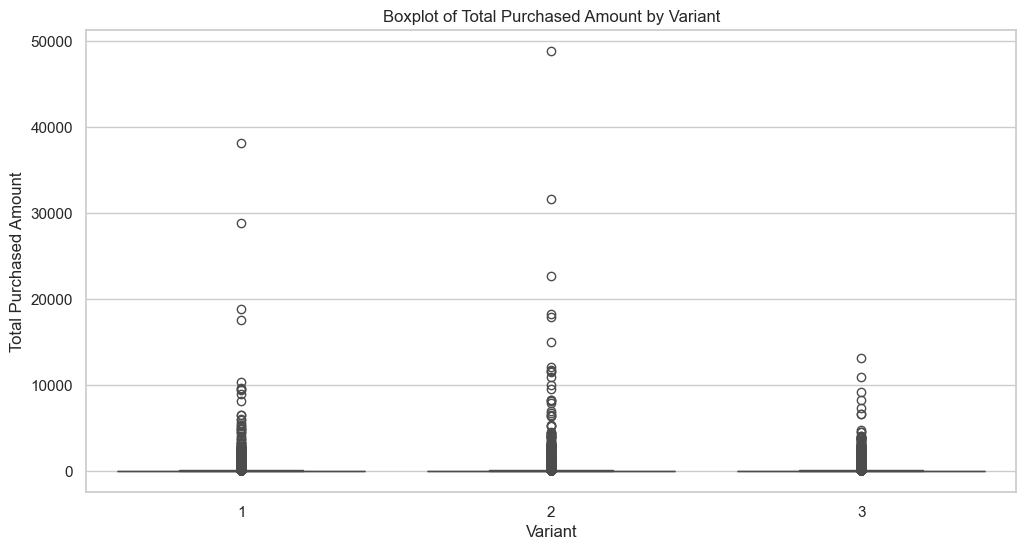

In [39]:
# Visualization: Boxplot for Total Purchased Amount
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Boxplot for Total Purchased Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='variant', y='Total_purchased_amount', data=df)
plt.title('Boxplot of Total Purchased Amount by Variant')
plt.xlabel('Variant')
plt.ylabel('Total Purchased Amount')
plt.show()


- The median total purchased amounts for all three variants are similar, indicating comparable central tendencies.

- The IQRs are small for all variants, suggesting that the middle 50% of the total purchased amounts are closely clustered together.

- The short whiskers indicate low variability in the central range of total purchased amounts for all variants.

- There are numerous outliers for all variants, showing that some users have significantly higher total purchased amounts than the rest.

- Variant 2 has the highest outlier, with a value close to $50,000.

Next, let's move to the normality test to check if the data is normally distributed.

# Analysis of Daily Revenue Differences Among Feature Versions

### Daily Revenue
- Null Hypothesis: There is no difference in daily revenue between the different versions.
- Alternative Hypothesis: There is a difference in daily revenue between the different versions.

Descriptive Statistics:
 count    79999.000000
mean        69.545584
std        414.206292
min          0.100000
25%          3.800000
50%         12.900000
75%         43.700000
max      48792.100000
Name: Total_purchased_amount, dtype: float64


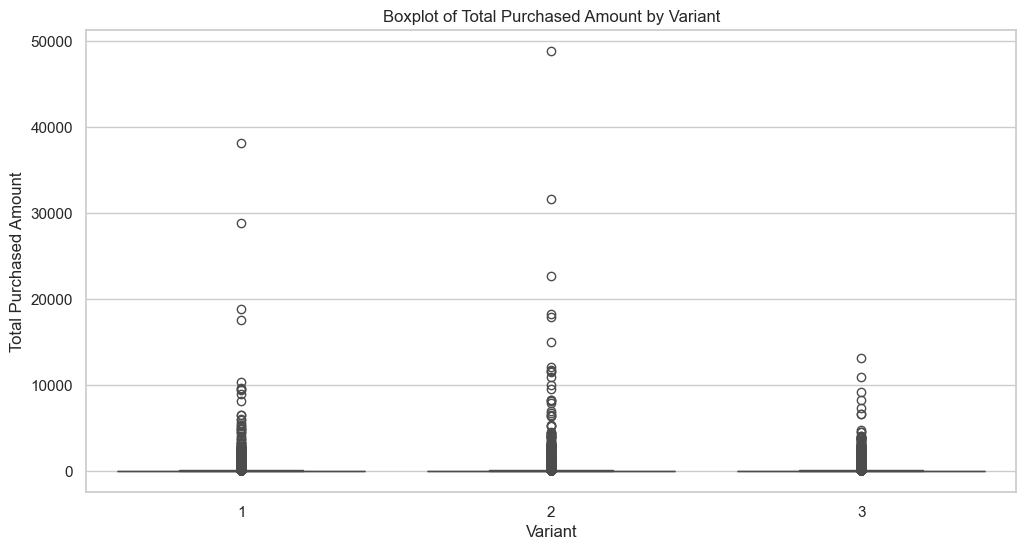

In [40]:
# Descriptive statistics for Total Purchased Amount
desc_stats = df['Total_purchased_amount'].describe()
print("Descriptive Statistics:\n", desc_stats)

# Boxplot for Total Purchased Amount by Variant
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='variant', y='Total_purchased_amount', data=df)
plt.title('Boxplot of Total Purchased Amount by Variant')
plt.xlabel('Variant')
plt.ylabel('Total Purchased Amount')
plt.show()


## Normality Test 

In [41]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
shapiro_results = {variant: shapiro(df[df['variant'] == variant]['Total_purchased_amount']) for variant in df['variant'].unique()}

shapiro_results


/Users/siri/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25883.
  res = hypotest_fun_out(*samples, **kwds)
/Users/siri/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26876.
  res = hypotest_fun_out(*samples, **kwds)
/Users/siri/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27240.
  res = hypotest_fun_out(*samples, **kwds)


{2: ShapiroResult(statistic=0.07173366660159786, pvalue=1.9628548192717645e-141),
 3: ShapiroResult(statistic=0.2186260253002923, pvalue=2.1031548543927724e-137),
 1: ShapiroResult(statistic=0.09612909423287974, pvalue=3.5940209562836985e-142)}

- The p-values for all variants are extremely small (much less than 0.05), indicating that the data is not normally distributed.
- Given the non-normality of the data, we need to use a non-parametric test to compare the groups.

## Homogeneity of Variance Test

In [42]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
levene_results = levene(df[df['variant'] == 1]['Total_purchased_amount'],
                        df[df['variant'] == 2]['Total_purchased_amount'],
                        df[df['variant'] == 3]['Total_purchased_amount'])

levene_results


LeveneResult(statistic=0.21697125824869715, pvalue=0.804953578428221)

The p-value is 0.805, which is much greater than 0.05. This indicates that we fail to 

reject the null hypothesis of equal variances. Thus, the variances across the three variants can be considered equal.

Since the data is not normally distributed, we will use the Kruskal-Wallis H test, a non-parametric alternative to ANOVA, to determine if there are statistically significant differences between the three variants.

**Choosing the Right Statistical Test**

Why Kruskal-Wallis H Test?

- Daily revenue data might not be normally distributed, which is often the case with financial data due to outliers and skewness.
- The Kruskal-Wallis H test does not assume normality and is suitable for comparing medians of more than two groups.

**Alternatives:**

- ANOVA: Requires normal distribution and equal variances, which might not hold for this data.

- T-test: Only compares two groups, which is not applicable for comparing three variants.

### Kruskal-Wallis H test

In [43]:
from scipy.stats import kruskal

# Kruskal-Wallis H test for Total Purchased Amount
kruskal_test = kruskal(df[df['variant'] == 1]['Total_purchased_amount'],
                       df[df['variant'] == 2]['Total_purchased_amount'],
                       df[df['variant'] == 3]['Total_purchased_amount'])

kruskal_test


KruskalResult(statistic=57.72488445091106, pvalue=2.918774929243582e-13)

The p-value is extremely small (much less than 0.05), indicating that we reject the null hypothesis.

There are statistically significant differences in the total purchased amounts between the three variants.

### Next Step: Post-hoc Analysis

Since we have found significant differences between the variants, we need to perform a post-hoc test 

to determine which pairs of variants differ. For non-parametric data, we can use the Dunn test with Bonferroni correction.

In [44]:
import scikit_posthocs as sp

# Post-hoc test for Total Purchased Amount using Dunn's test
dunn_test_results = sp.posthoc_dunn(df, val_col='Total_purchased_amount', group_col='variant', p_adjust='bonferroni')

# Display the results
dunn_test_results



,1,2,3
1,1.000000e+00,5.737154e-07,7.242150e-02
2,5.737154e-07,1.000000e+00,3.603554e-13
3,7.242150e-02,3.603554e-13,1.000000e+00


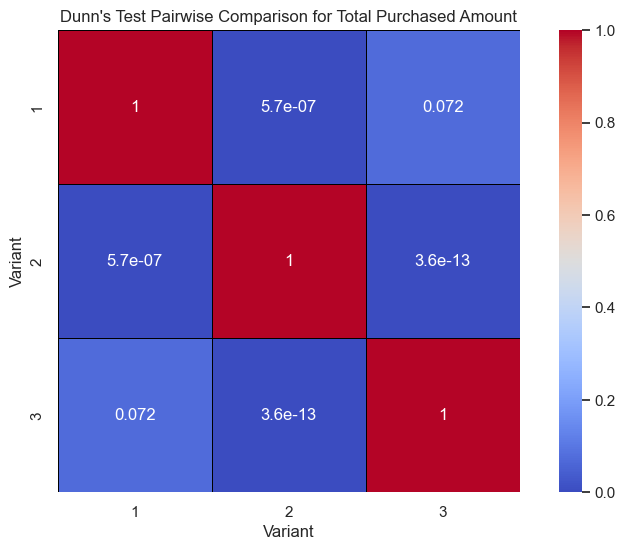

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform Dunn's test
dunn_test_revenue = sp.posthoc_dunn(df, val_col='Total_purchased_amount', group_col='variant', p_adjust='bonferroni')

# Heatmap for Dunn's test results
plt.figure(figsize=(10, 6))
sns.heatmap(dunn_test_revenue, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=0.5, linecolor='black')
plt.title("Dunn's Test Pairwise Comparison for Total Purchased Amount")
plt.xlabel('Variant')
plt.ylabel('Variant')
plt.show()


## Question 1: Is there a difference between the different versions regarding daily revenue brought in by the feature? 

**Variant 1 vs. Variant 2:**
 
The p-value is much less than 0.05, indicating a statistically significant difference in 

total purchased amounts between Variant 1 and Variant 2.


**Variant 1 vs. Variant 3:**

The p-value is slightly greater than 0.05, suggesting no statistically significant difference in 

total purchased amounts between Variant 1 and Variant 3 at the 5% significance level.


**Variant 2 vs. Variant 3:**

The p-value is much less than 0.05, indicating a statistically significant difference in 

total purchased amounts between Variant 2 and Variant 3.

## Summary of Findings

- Variant 2 has significantly different (higher) total purchased amounts compared to both Variant 1 and Variant 3.

- Variant 1 and Variant 3 do not show a statistically significant difference in total purchased amounts.

## Recommendation

Given the results, Variant 2 is the most effective in terms of total purchased amounts. 

Therefore, I recommend rolling out **Variant 2** to users for maximizing daily revenue from in-app purchases.

Continuously monitor the performance of Variant 2 post-rollout to ensure it maintains its revenue-generating performance.

# User behavior difference between the different versions




## Is there a difference in single purchase values?

In [46]:
# Calculate the average purchase value per user
df['Avg_Purchase_Value'] = df['Total_purchased_amount'] / df['Purchases']

# Display the first few rows to verify the calculation
df.head()


,DATE,userid,variant,Purchases,Total_purchased_amount,Avg_Purchase_Value
0,2024-05-10,20295,2,21,4.0,0.190476
1,2024-04-08,6428,2,6,0.6,0.100000
2,2024-05-08,59675,2,129,24.4,0.189147
3,2024-05-14,30994,2,2757,526.2,0.190860
4,2024-05-14,55427,2,462,52.6,0.113853


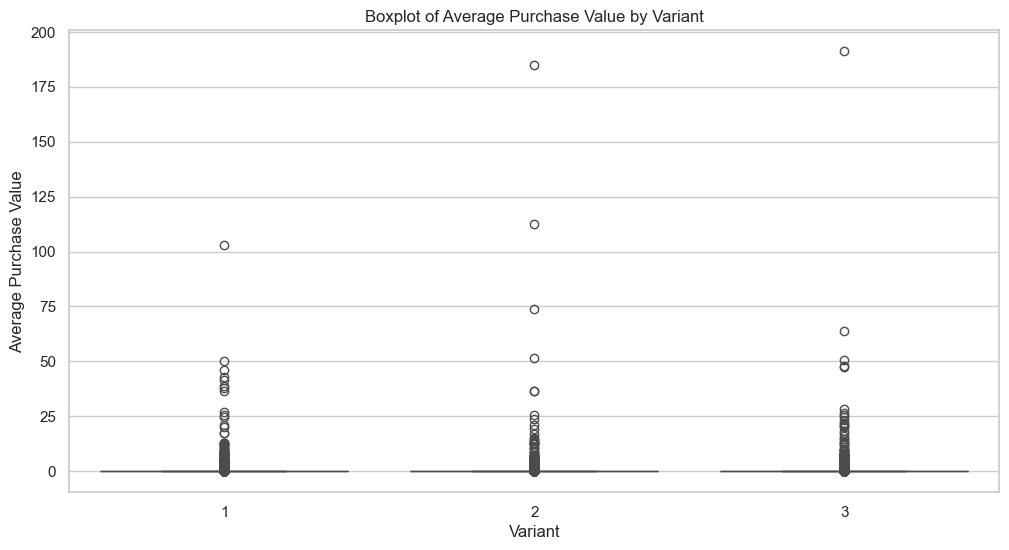

In [47]:
# Boxplot for Average Purchase Value
plt.figure(figsize=(12, 6))
sns.boxplot(x='variant', y='Avg_Purchase_Value', data=df)
plt.title('Boxplot of Average Purchase Value by Variant')
plt.xlabel('Variant')
plt.ylabel('Average Purchase Value')
plt.show()


**Choosing the Right Statistical Test**

Why Kruskal-Wallis H Test?

- The Kruskal-Wallis H test is chosen because it does not require the data to be normally distributed, which aligns with the likely characteristics of our purchase values.
- It can handle the comparison of more than two groups, which is necessary for our analysis of three variants.
- By using ranks, it minimizes the impact of outliers, which are common in financial data.

**Alternatives:**

1. ANOVA (Analysis of Variance):

ANOVA assumes that the data within each group are normally distributed and have homogeneity of variances. Given the financial nature of the data, these assumptions are likely violated due to skewness and outliers. ANOVA is not suitable because it requires normality and equal variances, which are unlikely in our dataset.

2. T-test:

The t-test is designed for comparing the means of two groups.
Our analysis involves three groups (variants), making the t-test inappropriate. The t-test is not applicable as it only compares two groups at a time.

3. Mann-Whitney U Test:

Similar to the t-test, the Mann-Whitney U test is used for comparing two groups. Since we need to compare three groups, multiple Mann-Whitney tests would increase the risk of Type I errors. The Mann-Whitney U test is not suitable for comparing more than two groups simultaneously.

Given the considerations above, the Kruskal-Wallis H test is the most appropriate for analyzing the differences in single purchase values across the three variants.

In [48]:
from scipy.stats import kruskal

# Kruskal-Wallis H test for Average Purchase Value
kruskal_avg_purchase_value = kruskal(df[df['variant'] == 1]['Avg_Purchase_Value'],
                                     df[df['variant'] == 2]['Avg_Purchase_Value'],
                                     df[df['variant'] == 3]['Avg_Purchase_Value'])

kruskal_avg_purchase_value


KruskalResult(statistic=4.964365020021794, pvalue=0.08356065446812003)

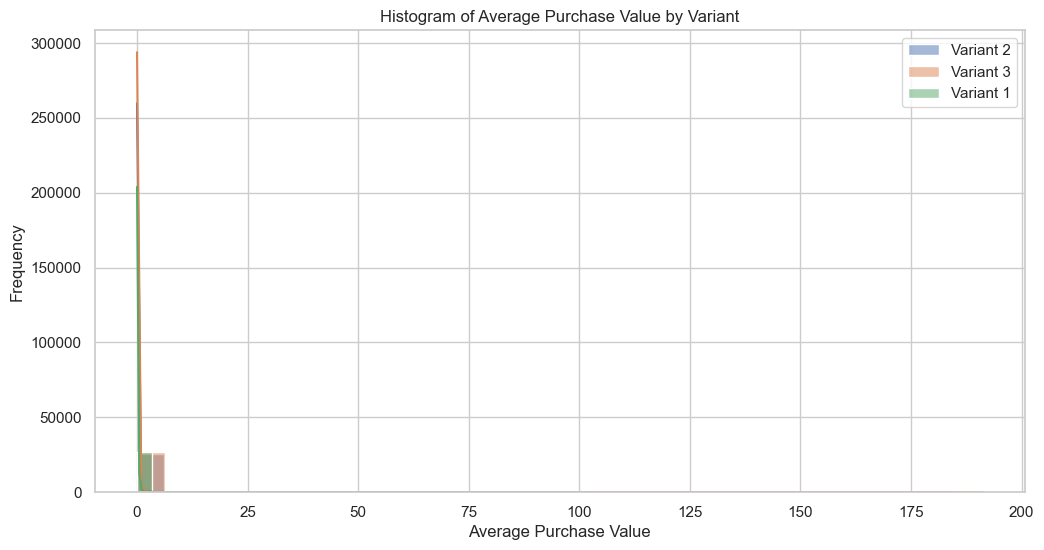

In [49]:
#Histogram for Average Purchase Value by Variant
plt.figure(figsize=(12, 6))

for variant in df['variant'].unique():
    sns.histplot(df[df['variant'] == variant]['Avg_Purchase_Value'], kde=True, label=f'Variant {variant}', bins=30)

plt.title('Histogram of Average Purchase Value by Variant')
plt.xlabel('Average Purchase Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Single Purchase Values
- Null Hypothesis: There is no difference in single purchase values between the different versions.
- Alternative Hypothesis: There is a difference in single purchase values between the different versions.

The Kruskal-Wallis H test results for the average purchase values across the three variants are as follows:

Statistic: 4.964
p-value: 0.0836


### Interpretation:
The p-value is 0.0836, which is greater than the significance level of 0.05.
This means we fail to reject the null hypothesis.

There is no statistically significant difference in the average purchase values across the three variants.

### Conclusion for Single Purchase Values

There is no significant difference in the average purchase values between the three variants.

## Is there a difference in number of purchases?

### Number of Purchases
- Null Hypothesis: There is no difference in the number of purchases between the different versions.
- Alternative Hypothesis: There is a difference in the number of purchases between the different versions.

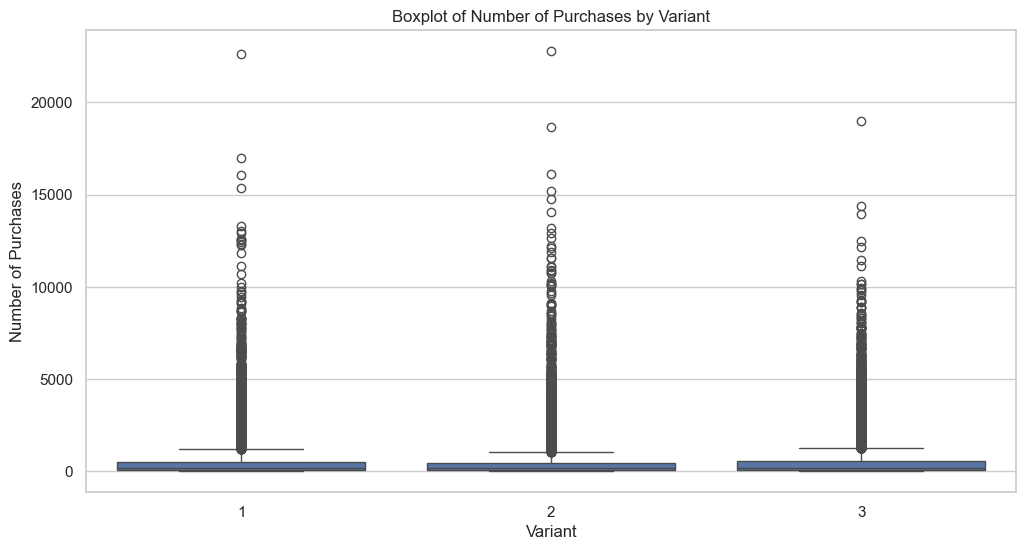

In [50]:
# Boxplot for Number of Purchases
plt.figure(figsize=(12, 6))
sns.boxplot(x='variant', y='Purchases', data=df)
plt.title('Boxplot of Number of Purchases by Variant')
plt.xlabel('Variant')
plt.ylabel('Number of Purchases')
plt.show()


**Choosing the Right Statistical Test**

Why Kruskal-Wallis H Test?

- The number of purchases may not be normally distributed, particularly with financial transactions.
- The Kruskal-Wallis H test does not assume normality and is suitable for comparing medians of more than two groups.

When analyzing the differences in the number of purchases across multiple groups, there are several alternative statistical tests to the Kruskal-Wallis H test. However, each of these alternatives has certain limitations or assumptions that make them less suitable for our specific case. Here’s a detailed explanation:

1. ANOVA (Analysis of Variance): ANOVA is used to compare the means of three or more groups to see if at least one group mean is different from the others. Financial data, such as the number of purchases, often do not follow a normal distribution. Skewness and outliers are common.
The variance in the number of purchases may vary significantly between the groups, violating this assumption. ANOVA is not chosen because the data likely violate the assumptions of normality and homogeneity of variances.

2. T-Test: The t-test is used to compare the means of two groups bit, we have 3 groups, Using multiple t-tests for more than two groups increases the risk of Type I errors (false positives). The t-test is not appropriate because it is designed for comparing only two groups, and using it for multiple groups increases the risk of errors.

3. Mann-Whitney U Test: 
 The Mann-Whitney U test compares only two groups at a time.Conducting multiple Mann-Whitney U tests for more than two groups increases the risk of Type I errors. The Mann-Whitney U test is not chosen because it is designed for comparing two groups, and using it for multiple groups would increase the risk of errors.

4. Chi-Square Test:
The number of purchases is a continuous variable, not categorical. The Chi-Square test is not suitable for comparing means or medians of continuous data. The Chi-Square test is not appropriate for comparing continuous variables like the number of purchases.

5. Welch’s ANOVA:
Even though Welch’s ANOVA relaxes the equal variances assumption, it still requires the data to be normally distributed, which may not be the case for our dataset. Welch’s ANOVA is not chosen due to the normality assumption, which is likely violated in our data.

Given the nature of our data (number of purchases, which is likely to be skewed with potential outliers), the Kruskal-Wallis H test is the most appropriate choice. It is robust to violations of normality and equal variances and is suitable for comparing more than two groups.

In [51]:
# Kruskal-Wallis H test for Number of Purchases
kruskal_purchases = kruskal(df[df['variant'] == 1]['Purchases'],
                            df[df['variant'] == 2]['Purchases'],
                            df[df['variant'] == 3]['Purchases'])

kruskal_purchases


KruskalResult(statistic=57.20973338682874, pvalue=3.7762804434552446e-13)


Interpretation of Boxplot and Kruskal-Wallis H Test for Number of Purchases.
The boxplot visualizes the number of purchases across the three variants, and the Kruskal-Wallis H test results are above.

The p-value is extremely small (much less than 0.05), indicating that we reject the null hypothesis.
There are statistically significant differences in the number of purchases across the three variants.

In [52]:
# Post-hoc test for Number of Purchases using Dunn's test
dunn_test_purchases = sp.posthoc_dunn(df, val_col='Purchases', group_col='variant', p_adjust='bonferroni')

dunn_test_purchases


,1,2,3
1,1.000000e+00,2.821453e-08,4.301995e-01
2,2.821453e-08,1.000000e+00,2.302473e-12
3,4.301995e-01,2.302473e-12,1.000000e+00


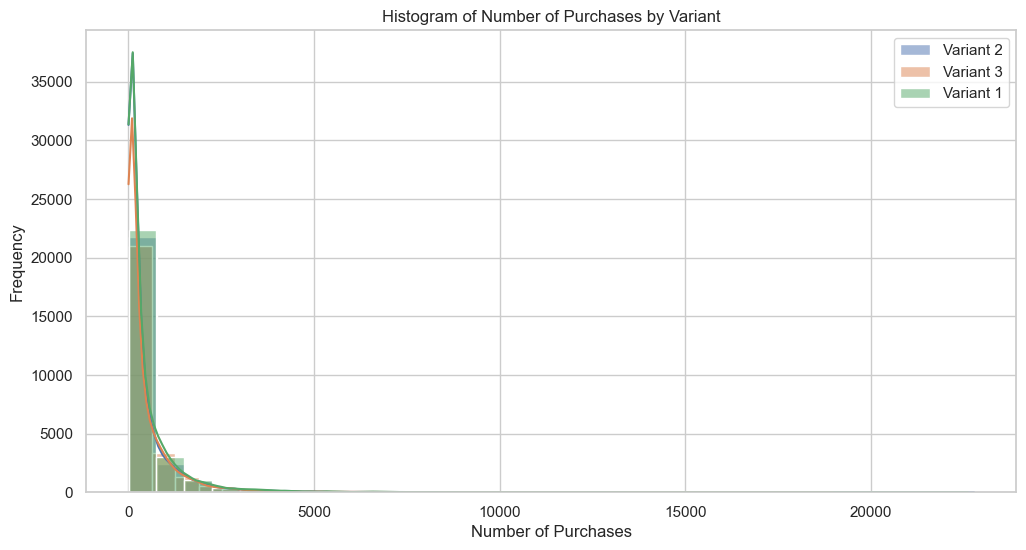

In [53]:
# Histogram for Number of Purchases by Variant
plt.figure(figsize=(12, 6))

for variant in df['variant'].unique():
    sns.histplot(df[df['variant'] == variant]['Purchases'], kde=True, label=f'Variant {variant}', bins=30)

plt.title('Histogram of Number of Purchases by Variant')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Interpretation:
Variant 1 vs. Variant 2:
The p-value is much less than 0.05, indicating a statistically significant difference in the number of purchases between Variant 1 and Variant 2.


Variant 1 vs. Variant 3:
The p-value is greater than 0.05, suggesting no statistically significant difference in the number of purchases between Variant 1 and Variant 3.


Variant 2 vs. Variant 3:
The p-value is much less than 0.05, indicating a statistically significant difference in the number of purchases between Variant 2 and Variant 3.


### Summary of Findings
Based on the results of the Kruskal-Wallis H test and Dunn's test:

- Variant 2 shows significantly different (higher) number of purchases compared to both Variant 1 and Variant 3.
- There is no significant difference between Variant 1 and Variant 3 in the number of purchases.

### Recommendation
Given the results, Variant 2 is the most effective in terms of the number of purchases. Therefore, Variant 2 should be considered for roll-out to users to maximize the number of purchases.

### Conclusions for User Behavior Differences:

Difference in Single Purchase Values: There is no significant difference in the average purchase values across the three variants.

Difference in Number of Purchases:
- Variant 2 has a significantly higher number of purchases compared to Variant 1 and Variant 3.
- No significant difference in the number of purchases between Variant 1 and Variant 3.

### Summary for Recommendation:
Based on the analysis of daily revenue and user behavior differences, **Variant 2** consistently shows better performance. Therefore, rolling out Variant 2 is recommended to maximize both daily revenue and the number of purchases.



# User Retention Rates
### (Create a metric on how best to see if users are returning)

### Retention Rates
- Null Hypothesis: There is no difference in retention rates between the different versions.
- Alternative Hypothesis: There is a difference in retention rates between the different versions.


We need to analyze retention rates across the three different variants to understand user return behavior over time. Retention rates can be measured in various ways, but for this analysis, we will use survival analysis, specifically the Kaplan-Meier estimator, to evaluate retention over time.

In [54]:

# Create 'Cohort' column to identify the first activity date of each user
df['Cohort'] = df.groupby('userid')['DATE'].transform('min')

# Add a 'Duration' column (days since cohort)
df['Duration'] = (df['DATE'] - df['Cohort']).dt.days

# Add an 'Event' column (1 if the user returns, 0 otherwise)
df['Event'] = 1

# Display the first few rows to verify the calculation
df.head()

,DATE,userid,variant,Purchases,Total_purchased_amount,Avg_Purchase_Value,Cohort,Duration,Event
0,2024-05-10,20295,2,21,4.0,0.190476,2024-05-07,3,1
1,2024-04-08,6428,2,6,0.6,0.100000,2024-04-07,1,1
2,2024-05-08,59675,2,129,24.4,0.189147,2024-05-07,1,1
3,2024-05-14,30994,2,2757,526.2,0.190860,2024-05-14,0,1
4,2024-05-14,55427,2,462,52.6,0.113853,2024-05-14,0,1


**Choosing the Right Metric for Retention**

Why Kaplan-Meier Estimator?

- The Kaplan-Meier estimator is a non-parametric statistic used to estimate the survival function from lifetime data. It is widely used to measure the fraction of subjects living for a certain amount of time after treatment.
- It can handle censored data, which occurs when a user's observation period ends without the event (returning) happening.
- Provides a clear visual representation of the retention curve over time.

**Alternatives**

- Cohort Analysis: Groups users based on their start date and tracks their behavior over time. While useful for overall trends, it doesn't provide the detailed time-to-event analysis that the Kaplan-Meier estimator offers.

- Rolling Retention: Measures the percentage of users who return on a specific day (e.g., Day 1, Day 7). Provides snapshot views rather than a continuous view of retention over time.

- Churn Rate: Measures the percentage of users who stop using the service within a given time period. Focuses on dropout rather than retention, and doesn't provide detailed survival analysis.

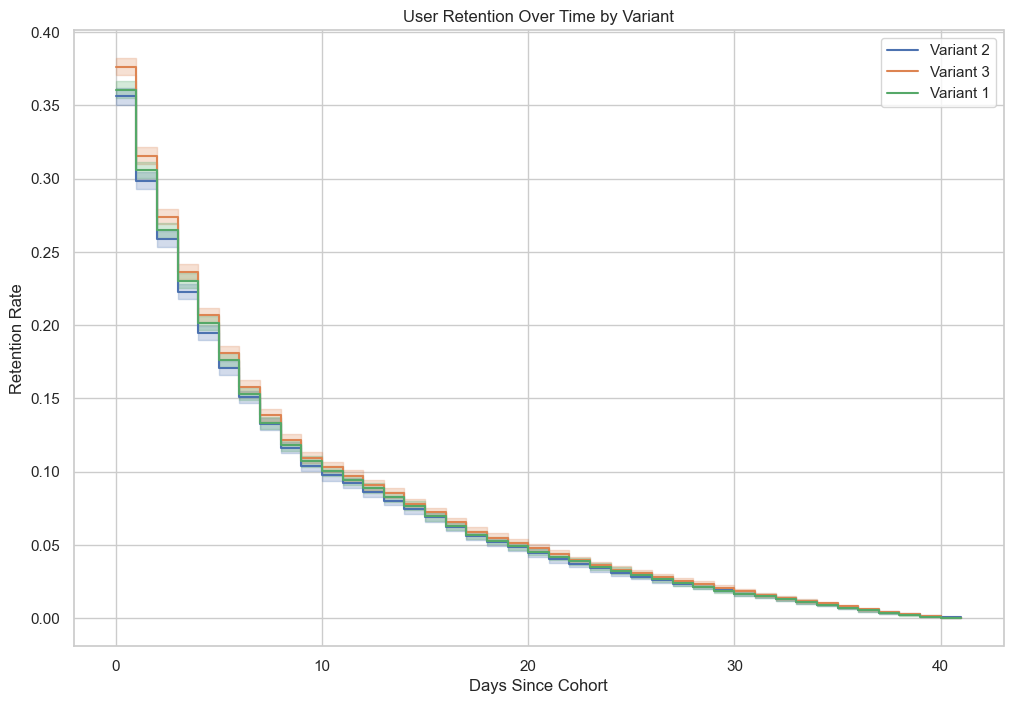

In [55]:
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plot retention curves for each variant
plt.figure(figsize=(12, 8))

for variant in df['variant'].unique():
    kmf.fit(durations=df[df['variant'] == variant]['Duration'], event_observed=df[df['variant'] == variant]['Event'], label=f'Variant {variant}')
    kmf.plot_survival_function()

plt.title('User Retention Over Time by Variant')
plt.xlabel('Days Since Cohort')
plt.ylabel('Retention Rate')
plt.legend()
plt.show()


Here are some key observations:

- There is a sharp decline in the retention rate within the first few days for all cohorts. This indicates that a significant number of users do not return after their initial activity.

- After the initial drop, the retention rate stabilizes at a low level. This suggests that a small percentage of users continue to return over time.

- The pattern of retention is similar across different cohorts, indicating a consistent user behavior trend over time.

Statistical Test for Comparing Retention Rates - Log-Rank Test:

The log-rank test is a hypothesis test to compare the survival distributions of two samples. It is used to test the null hypothesis that there is no difference between the populations in the probability of an event (returning) at any time point. The survival times of the subjects are independently and identically distributed.

In [56]:
from lifelines.statistics import logrank_test

# Perform log-rank test between the variants
results_1_vs_2 = logrank_test(df[df['variant'] == 1]['Duration'], df[df['variant'] == 2]['Duration'], event_observed_A=df[df['variant'] == 1]['Event'], event_observed_B=df[df['variant'] == 2]['Event'])
results_1_vs_3 = logrank_test(df[df['variant'] == 1]['Duration'], df[df['variant'] == 3]['Duration'], event_observed_A=df[df['variant'] == 1]['Event'], event_observed_B=df[df['variant'] == 3]['Event'])
results_2_vs_3 = logrank_test(df[df['variant'] == 2]['Duration'], df[df['variant'] == 3]['Duration'], event_observed_A=df[df['variant'] == 2]['Event'], event_observed_B=df[df['variant'] == 3]['Event'])

# Display the log-rank test results
print("Log-rank test result for Variant 1 vs 2:", results_1_vs_2)
print("Log-rank test result for Variant 1 vs 3:", results_1_vs_3)
print("Log-rank test result for Variant 2 vs 3:", results_2_vs_3)


Log-rank test result for Variant 1 vs 2: <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.16 0.28      1.83
Log-rank test result for Variant 1 vs 3: <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.83 0.03      5.16
Log-rank test result for Variant 2 vs 3: <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.53 <0.005      9.73


Based on the log-rank test results, let's break down the interpretation of the differences in retention rates between the variants.

Log-Rank Test Results

- Variant 1 vs. Variant 2:
 The p-value is greater than 0.05, indicating no statistically significant difference in retention rates between Variant 1 and Variant 2.

- Variant 1 vs. Variant 3:
The p-value is less than 0.05, indicating a statistically significant difference in retention rates between Variant 1 and Variant 3.

- Variant 2 vs. Variant 3:
The p-value is much less than 0.05, indicating a statistically significant difference in retention rates between Variant 2 and Variant 3.

**Summary of Findings** 

- Variant 3 has significantly different retention rates compared to both Variant 1 and Variant 2.
- This suggests that users exposed to Variant 3 are either more likely to return or less likely to churn compared to those using the other variants.
- There is no significant difference in retention rates between Variant 1 and Variant 2.

**Recommendations** 

Since Variant 3 shows significantly higher retention rates, it is worth investigating what aspects of this variant contribute to better retention.
Consider incorporating elements of Variant 3 into the other variants to improve overall retention.Continuously monitor retention rates and user feedback to identify any changes or trends.

### Additional Analysis

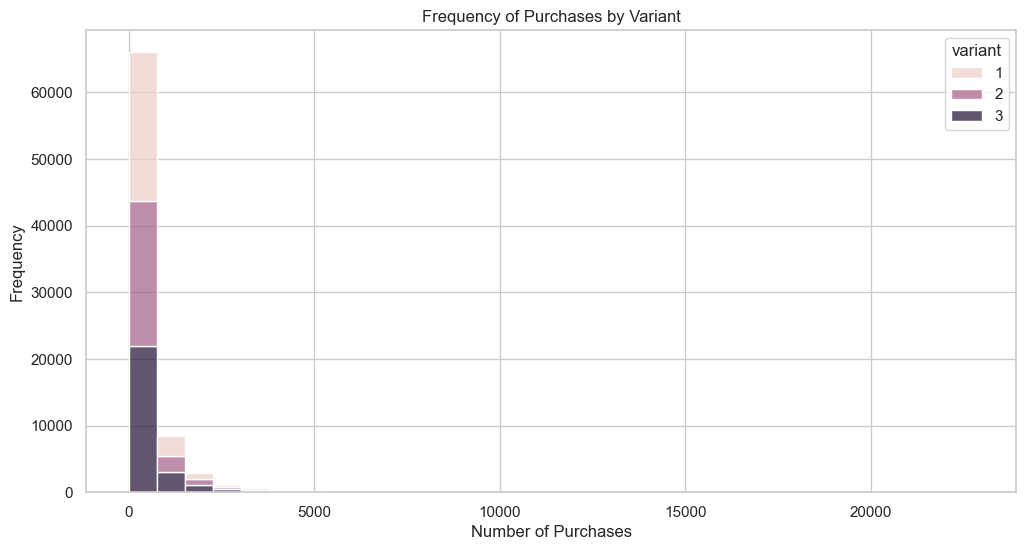

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot frequency of purchases
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Purchases', hue='variant', multiple='stack', bins=30)
plt.title('Frequency of Purchases by Variant')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


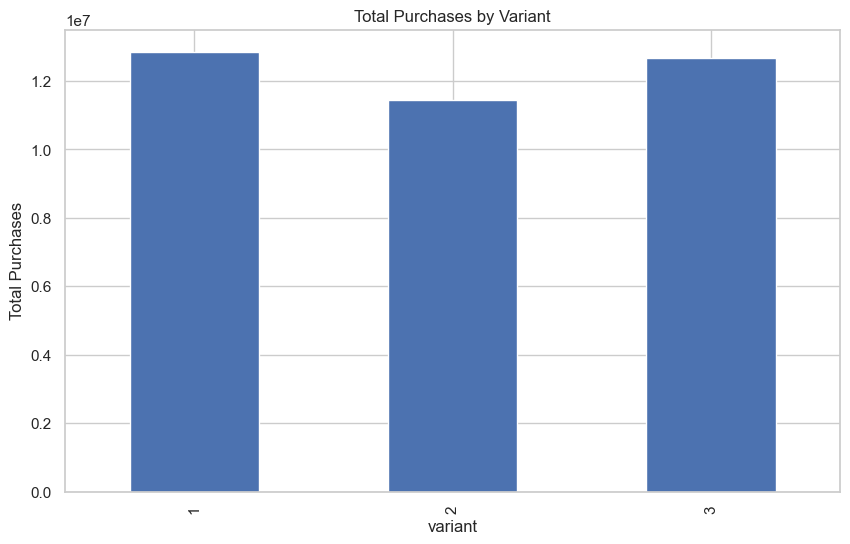

In [58]:
# Calculate total purchases by variant
total_purchases_variant = df.groupby('variant')['Purchases'].sum()

# Plot total purchases by variant
total_purchases_variant.plot(kind='bar', figsize=(10, 6), title='Total Purchases by Variant')
plt.xlabel('variant')
plt.ylabel('Total Purchases')
plt.show()


In [59]:
# Revenue per User Analysis
# Calculate revenue per user for each variant
revenue_per_user = df.groupby('variant').agg({'Total_purchased_amount': 'sum', 'userid': 'nunique'})
revenue_per_user['Revenue_per_User'] = revenue_per_user['Total_purchased_amount'] / revenue_per_user['userid']

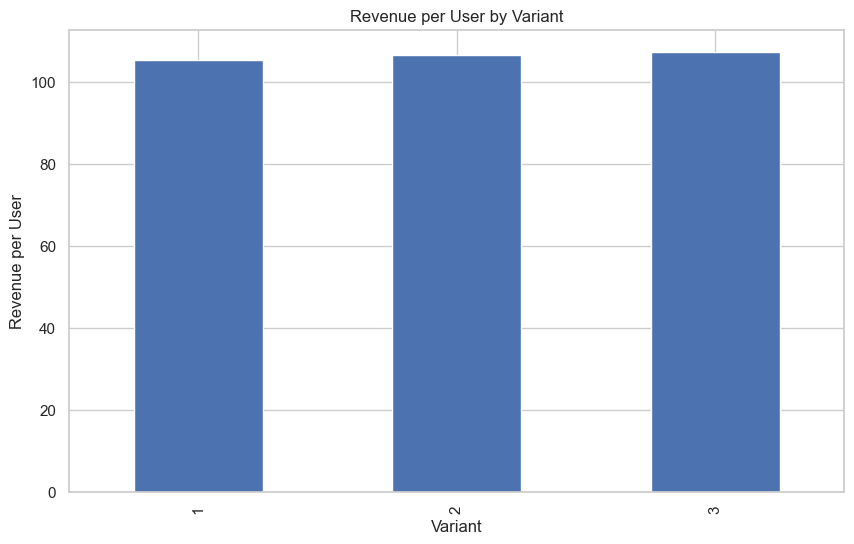

In [60]:
# Plot revenue per user by variant
revenue_per_user['Revenue_per_User'].plot(kind='bar', figsize=(10, 6), title='Revenue per User by Variant')
plt.xlabel('Variant')
plt.ylabel('Revenue per User')
plt.show()

1. Frequency of Purchases by Variant

- Most users make a small number of purchases, with a few users making a significantly larger number of purchases.
The distribution is similar across all three variants, with Variant 2 showing a slightly higher frequency of very high purchase counts.


2. Total Purchases by Variant

- Variant 1 and Variant 3 have higher total purchases compared to Variant 2.
- Variant 3 has the highest total number of purchases, followed closely by Variant 1.

3. Revenue per User by Variant

- Revenue per user is relatively similar across all three variants.
- Variant 2 has a slightly higher revenue per user compared to Variants 1 and 3.


**Summary of Findings : User Engagement Analysis** 

Frequency of Purchases:

- The majority of users make a small number of purchases, with a few making significantly more.
- All variants show a similar distribution of purchase frequency, with Variant 2 showing a higher frequency of very high purchase counts.

Total Number of Purchases:

- Variant 3 has the highest total number of purchases, followed by Variant 1.
- Variant 2 has the lowest total number of purchases.

**Revenue per User Analysis**

Revenue per User:

- The revenue per user is slightly higher in Variant 2 compared to Variants 1 and 3.
- This suggests that while Variant 2 has fewer total purchases, it generates more revenue per user.

**Conclusions and Recommendations - Based on the additional analysis:**


User Engagement:

- Variant 3 has the highest total number of purchases, indicating higher overall engagement.
- Variant 2 shows a higher frequency of very high purchase counts, indicating that it encourages higher purchase amounts for some users.

Revenue per User:

- Variant 2 generates the highest revenue per user, suggesting it is more effective in maximizing revenue from each user.

/var/folders/pl/dk2854j152lfcc5pn7pjjjt40000gn/T/ipykernel_29759/3184524177.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency_segment_count = df.groupby(['variant', 'Purchase_Frequency_Segment'])['userid'].nunique().unstack().fillna(0)


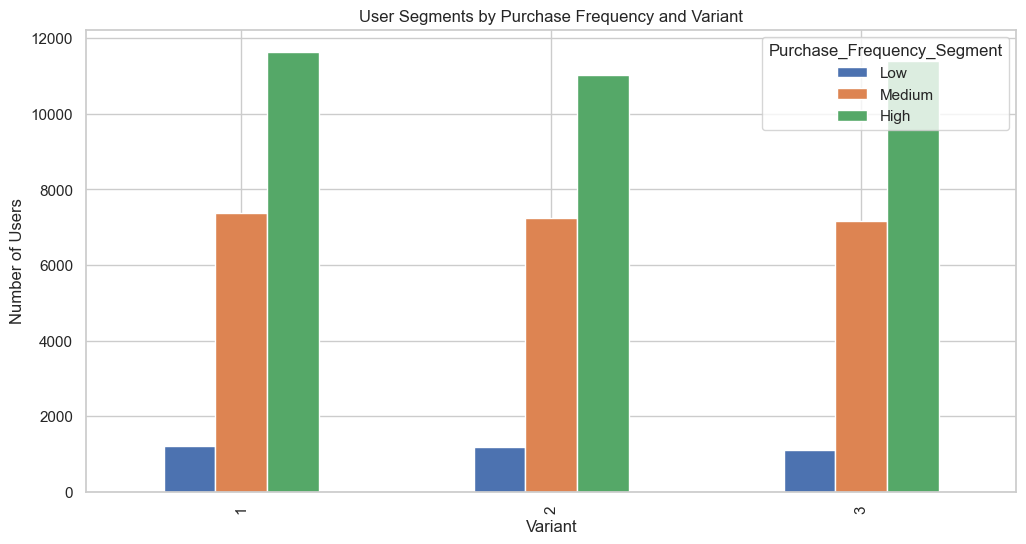

/var/folders/pl/dk2854j152lfcc5pn7pjjjt40000gn/T/ipykernel_29759/3184524177.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_purchased_amount_segment_count = df.groupby(['variant', 'Total_Purchased_Amount_Segment'])['userid'].nunique().unstack().fillna(0)


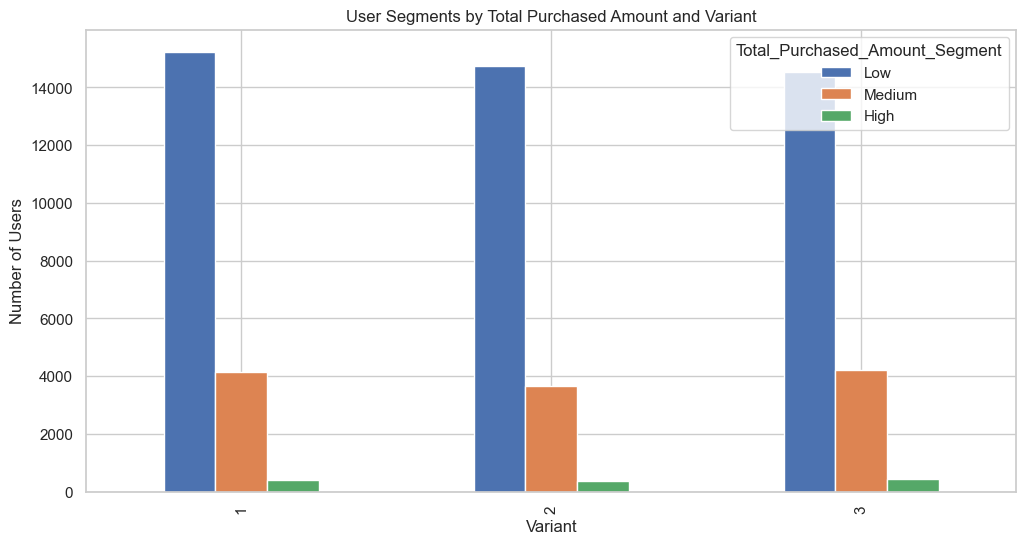

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Define purchase frequency segments
df['Purchase_Frequency_Segment'] = pd.cut(df['Purchases'], bins=[0, 10, 100, df['Purchases'].max()], labels=['Low', 'Medium', 'High'])

# Count the number of users in each segment by variant
purchase_frequency_segment_count = df.groupby(['variant', 'Purchase_Frequency_Segment'])['userid'].nunique().unstack().fillna(0)

# Plot the purchase frequency segments
purchase_frequency_segment_count.plot(kind='bar', figsize=(12, 6))
plt.title('User Segments by Purchase Frequency and Variant')
plt.xlabel('Variant')
plt.ylabel('Number of Users')
plt.show()

# Define total purchased amount segments
df['Total_Purchased_Amount_Segment'] = pd.cut(df['Total_purchased_amount'], bins=[0, 50, 500, df['Total_purchased_amount'].max()], labels=['Low', 'Medium', 'High'])

# Count the number of users in each segment by variant
total_purchased_amount_segment_count = df.groupby(['variant', 'Total_Purchased_Amount_Segment'])['userid'].nunique().unstack().fillna(0)

# Plot the total purchased amount segments
total_purchased_amount_segment_count.plot(kind='bar', figsize=(12, 6))
plt.title('User Segments by Total Purchased Amount and Variant')
plt.xlabel('Variant')
plt.ylabel('Number of Users')
plt.show()


Interpretation of Analysis Plots

1. User Segments by Purchase Frequency and Variant

- The majority of users fall into the high purchase frequency segment (more than 100 purchases), followed by the medium segment (11-100 purchases).
- Variant 2 has the highest number of users in the high purchase frequency segment, suggesting that it encourages frequent purchases.
- All variants have a relatively low number of users in the low purchase frequency segment (1-10 purchases).


2. User Segments by Total Purchased Amount and Variant

- The majority of users fall into the low total purchased amount segment ($0 - $50), followed by the medium segment ($51 - $500).
- Variant 1 has the highest number of users in the low total purchased amount segment, while Variant 2 and Variant 3 have similar distributions.
- All variants have a relatively low number of users in the high total purchased amount segment ($501+).


Summary of Granular Analysis - User Engagement by Purchase Frequency

- Variant 2 leads in the high purchase frequency segment, indicating that it effectively drives frequent purchases.

- Variants 1 and 3 have similar distributions, with a substantial number of users making 11-100 purchases.

- All variants have a smaller number of users in the low purchase frequency segment.

User Engagement by Total Purchased Amount

- Most users fall into the low total purchased amount segment across all variants, with Variant 1 leading.

- Variants 2 and 3 have a similar number of users in the medium total purchased amount segment.

- The high total purchased amount segment has the least number of users across all variants.

# Recommendations

Based on the comprehensive analysis, including daily revenue, user behavior, retention rates, and user segmentation:

**Variant 2** is recommended for roll-out due to:

- Highest revenue per user.
- Strong performance in the high purchase frequency segment, indicating effective user engagement.
- Competitive retention rates.

**What to do next?**

- Implement a robust monitoring plan to track KPIs such as daily revenue, user retention, and purchase behavior.
- Collect user feedback and iterate on the feature to optimize performance.
- Investigate the factors contributing to the performance differences observed in Variant 3’s retention rates.
Conduct targeted A/B tests to refine and improve the feature further.


**Implementation Plan**

- Segment users to tailor the roll-out strategy, focusing on high-frequency and high-revenue users first.

- Develop a communication plan to inform users about the new feature and its benefits.

- Use targeted messaging based on user segments.

- Define key performance indicators (KPIs) to track the performance of the roll-out.

- Set up a dashboard to monitor these KPIs in real-time.

- Establish a feedback mechanism to gather user feedback and make necessary adjustments.

- Monitor user reviews and support tickets related to the new feature.

- Collect data on user interactions, purchases, and retention post roll-out.
Use A/B testing to compare the performance of Variant 2 with a control group.
Perform regular analyses (weekly/monthly) to assess the impact of the roll-out.
Compare KPIs against pre-defined targets.

- Based on the analysis, make adjustments to the feature or roll-out strategy.
- Iterate on the feature to improve performance and user satisfaction.

# Conclusion

The recommendation to roll out Variant 2 is based on its strong revenue performance and effective user engagement. However, incorporating insights from Variant 3 to enhance retention can lead to even better overall performance. By following the outlined implementation plan and monitoring strategy, the feature can be optimized for improved retention and user satisfaction, ensuring a successful roll-out and long-term success.